<a href="https://colab.research.google.com/github/Daya-1-sgr/Call_centre_sentiment_analysis/blob/main/call_centre_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
file_path="/content/drive/MyDrive/Call-Center-Sentiment-Data-for-Analysis.xlsx"

Loading the excel file and Checking the sheet names

In [3]:
excel_data = pd.ExcelFile(file_path)
sheet_names = excel_data.sheet_names

In [4]:
print(sheet_names)

['Call Center Data']


Load the data from the identified sheet

In [5]:
df = pd.read_excel(file_path, sheet_name='Call Center Data')

Display the first few rows of the dataset to understand its structure

In [6]:
df.head()

,ID,Customer Name,Sentiment,CSAT Score,Call Timestamp,Reason,City,State,Channel,Response Time,Call Duration (Minutes),Call Center
0,PIS-39858047,Frances Gullefant,Neutral,8,2024-01-01,Billing Question,Charleston,West Virginia,Chatbot,Within SLA,14,Chicago/IL
1,ROH-40287216,Harcourt Zoanetti,Negative,5,2024-01-01,Billing Question,Honolulu,Hawaii,Call-Center,Within SLA,32,Los Angeles/CA
2,NKC-39578431,Washington Oxteby,Negative,3,2024-01-02,Billing Question,Dallas,Texas,Chatbot,Within SLA,6,Denver/CO
3,APY-17008648,Rafe Duffitt,Very Negative,4,2024-01-02,Billing Question,Fort Myers,Florida,Email,Below SLA,26,Los Angeles/CA
4,MHK-38443501,Tris Bent,Positive,8,2024-01-02,Billing Question,Tuscaloosa,Alabama,Web,Within SLA,26,Los Angeles/CA


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       70 non-null     object        
 1   Customer Name            70 non-null     object        
 2   Sentiment                70 non-null     object        
 3   CSAT Score               70 non-null     int64         
 4   Call Timestamp           70 non-null     datetime64[ns]
 5   Reason                   70 non-null     object        
 6   City                     70 non-null     object        
 7   State                    70 non-null     object        
 8   Channel                  70 non-null     object        
 9   Response Time            70 non-null     object        
 10  Call Duration (Minutes)  70 non-null     int64         
 11  Call Center              70 non-null     object        
dtypes: datetime64[ns](1), int64(2), object

Summary statistics for numerical columns

In [8]:
df.describe()

,CSAT Score,Call Timestamp,Call Duration (Minutes)
count,70.000000,70,70.000000
mean,5.328571,2024-01-16 08:34:17.142857216,26.257143
min,1.000000,2024-01-01 00:00:00,6.000000
25%,3.000000,2024-01-08 00:00:00,14.000000
50%,5.000000,2024-01-16 12:00:00,29.500000
75%,7.000000,2024-01-24 00:00:00,36.000000
max,10.000000,2024-01-31 00:00:00,45.000000
std,2.387901,NaN,12.576359


Summary statistics for categorical columns

In [9]:
df.describe(include=['object'])

,ID,Customer Name,Sentiment,Reason,City,State,Channel,Response Time,Call Center
count,70,70,70,70,70,70,70,70,70
unique,70,70,5,3,57,29,4,3,4
top,PIS-39858047,Frances Gullefant,Negative,Billing Question,Minneapolis,Texas,Call-Center,Within SLA,Los Angeles/CA
freq,1,1,29,50,3,9,23,53,30


Distribution Analysis

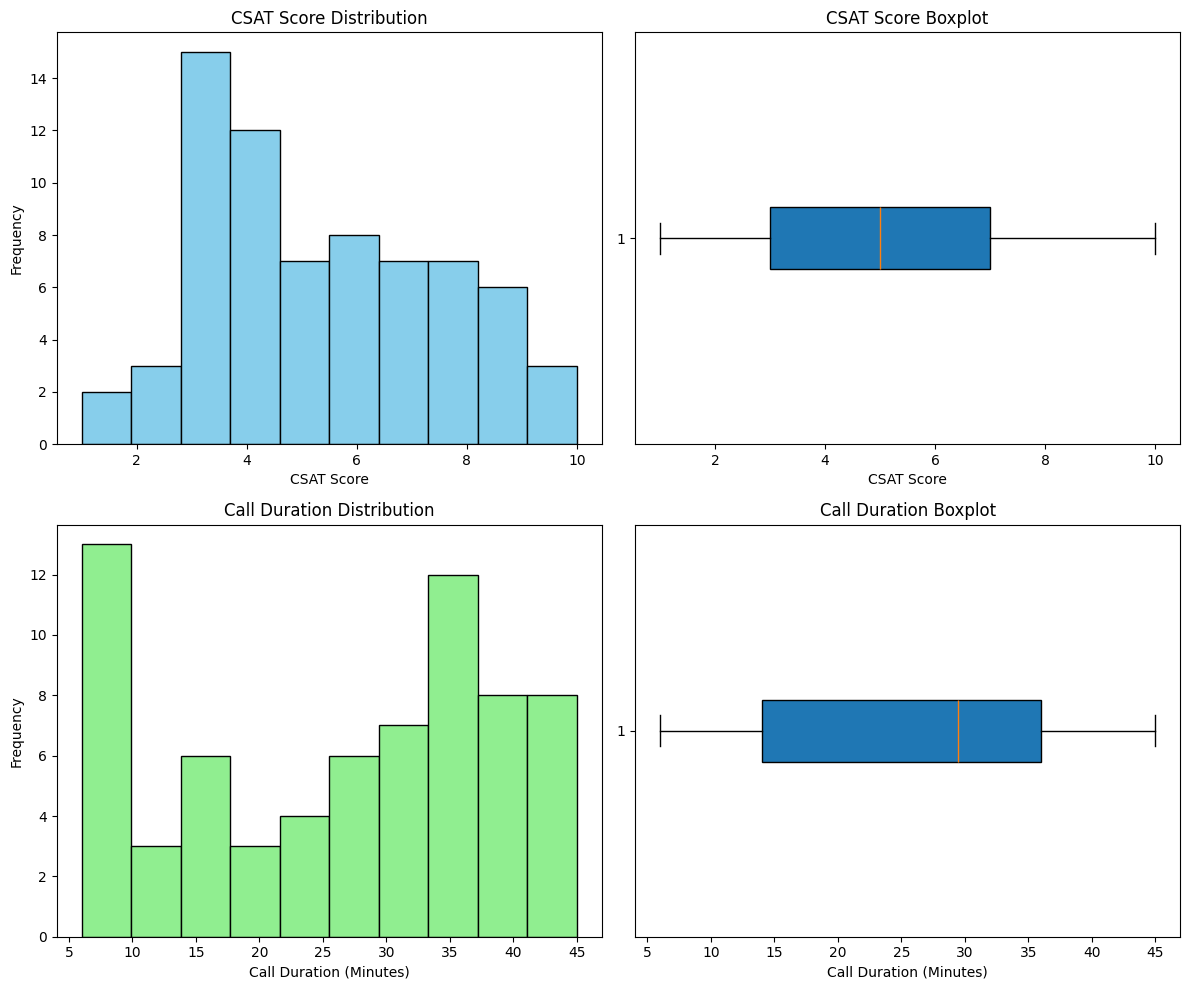

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))


axes[0, 0].hist(df['CSAT Score'], bins=10, color='skyblue', edgecolor='black')
axes[0, 0].set_title('CSAT Score Distribution')
axes[0, 0].set_xlabel('CSAT Score')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].boxplot(df['CSAT Score'], vert=False, patch_artist=True)
axes[0, 1].set_title('CSAT Score Boxplot')
axes[0, 1].set_xlabel('CSAT Score')

axes[1, 0].hist(df['Call Duration (Minutes)'], bins=10, color='lightgreen', edgecolor='black')
axes[1, 0].set_title('Call Duration Distribution')
axes[1, 0].set_xlabel('Call Duration (Minutes)')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].boxplot(df['Call Duration (Minutes)'], vert=False, patch_artist=True)
axes[1, 1].set_title('Call Duration Boxplot')
axes[1, 1].set_xlabel('Call Duration (Minutes)')

plt.tight_layout()
plt.show()

Sentiment Analysis

<ipython-input-11-29b32c0eeff0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sentiment', data=df, palette='viridis')


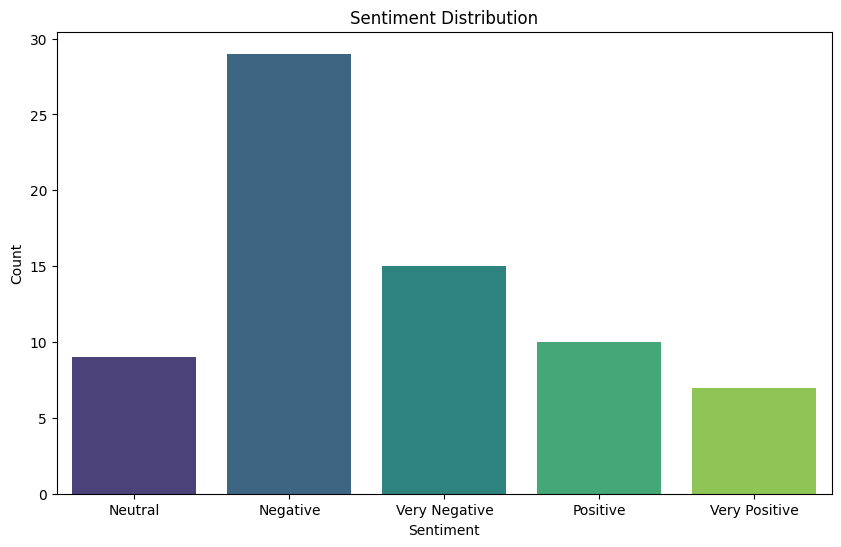

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', data=df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Boxplot for CSAT Score by Sentiment

<ipython-input-12-d6eef7a80a70>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='CSAT Score', data=df, palette='viridis')


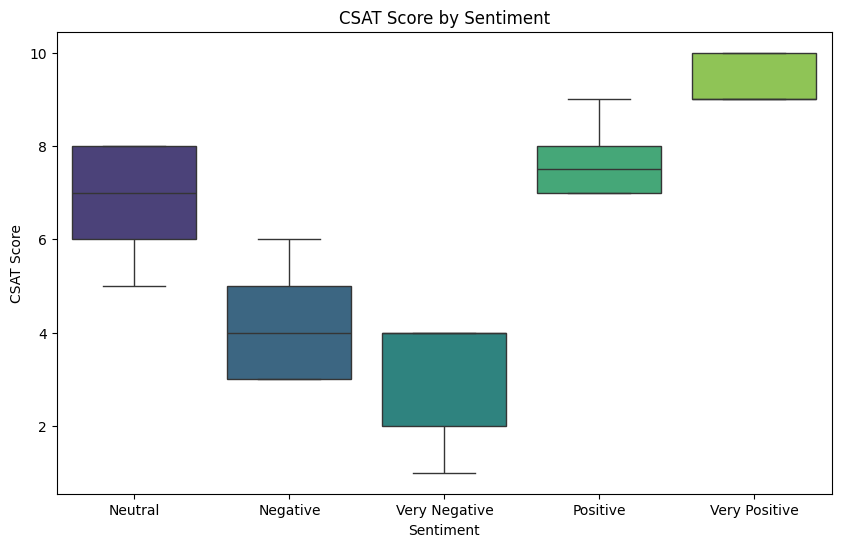

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='CSAT Score', data=df, palette='viridis')
plt.title('CSAT Score by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('CSAT Score')
plt.show()

Boxplot for Call Duration by Sentiment

<ipython-input-13-2ae05037fdd7>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sentiment', y='Call Duration (Minutes)', data=df, palette='viridis')


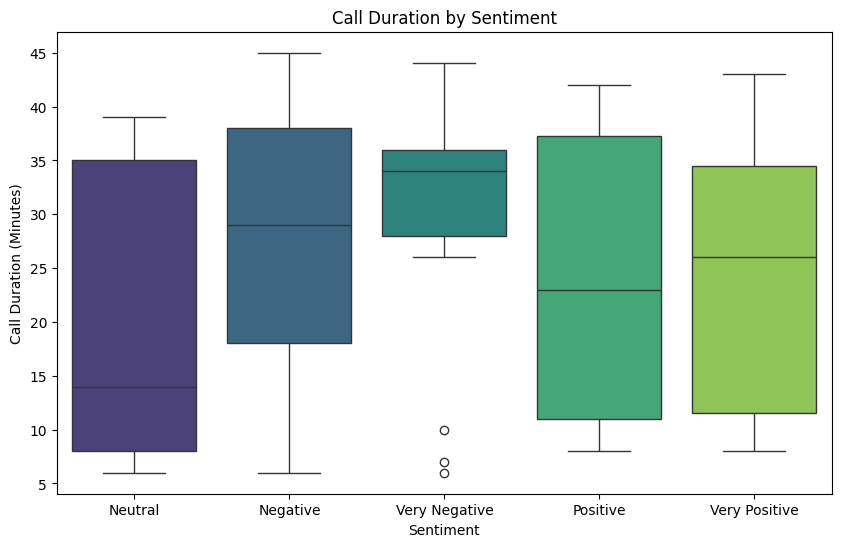

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Sentiment', y='Call Duration (Minutes)', data=df, palette='viridis')
plt.title('Call Duration by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Call Duration (Minutes)')
plt.show()

Boxplot for CSAT Score by Channel

<ipython-input-14-ca6deac6aa3a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Channel', y='CSAT Score', data=df, palette='Set2')


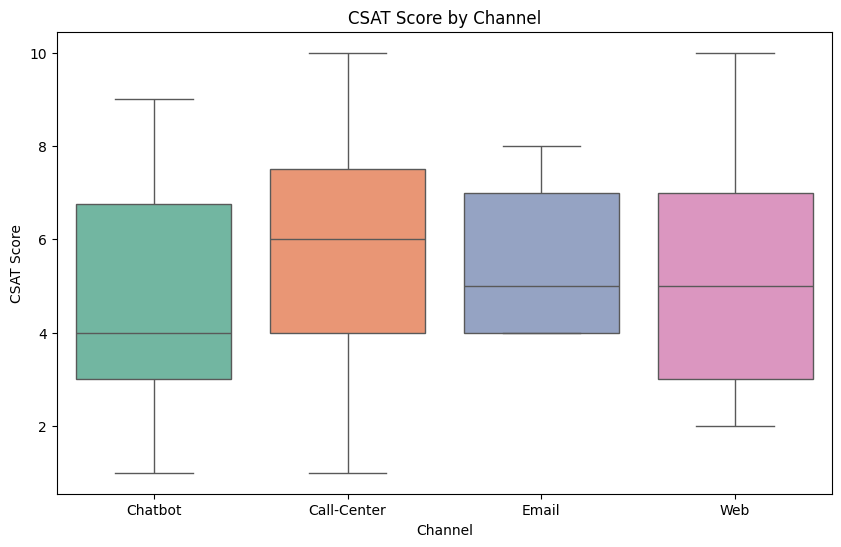

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Channel', y='CSAT Score', data=df, palette='Set2')
plt.title('CSAT Score by Channel')
plt.xlabel('Channel')
plt.ylabel('CSAT Score')
plt.show()

 Boxplot for CSAT Score by Response Time

<ipython-input-15-95ab098627f3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Response Time', y='CSAT Score', data=df, palette='Set2')


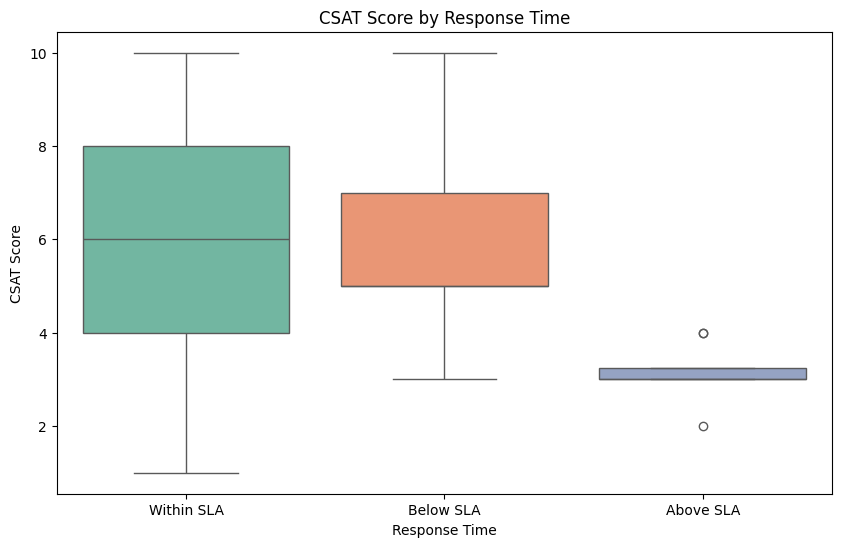

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Response Time', y='CSAT Score', data=df, palette='Set2')
plt.title('CSAT Score by Response Time')
plt.xlabel('Response Time')
plt.ylabel('CSAT Score')
plt.show()

Boxplot for Sentiment by Channel

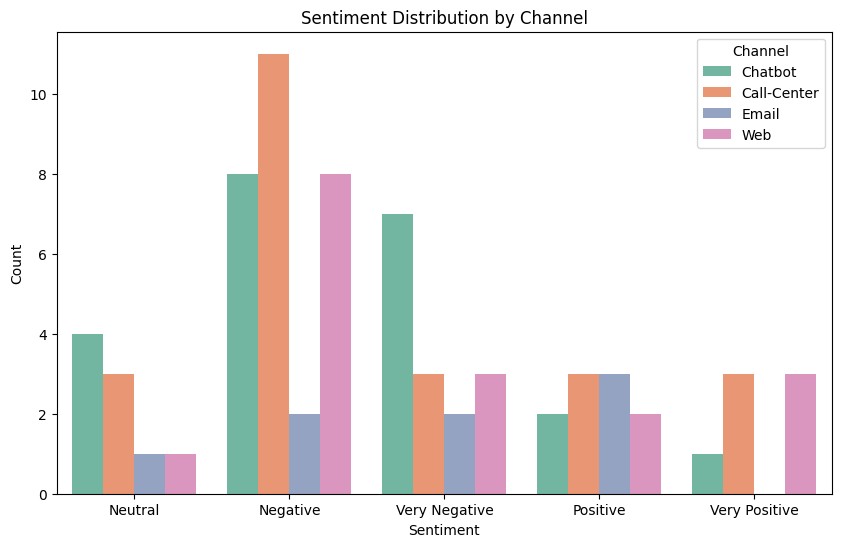

In [16]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Sentiment', hue='Channel', data=df, palette='Set2')
plt.title('Sentiment Distribution by Channel')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()


Correlation Analysis

Encode the Sentiment variable numerically for correlation analysis

In [17]:
sentiment_mapping = {
    "Very Negative": 1,
    "Negative": 2,
    "Neutral": 3,
    "Positive": 4,
    "Very Positive": 5
}

df['Sentiment Score'] = df['Sentiment'].map(sentiment_mapping)


correlation matrix

In [18]:
correlation_matrix = df[['CSAT Score', 'Call Duration (Minutes)', 'Sentiment Score']].corr()

Correlation Heatmap

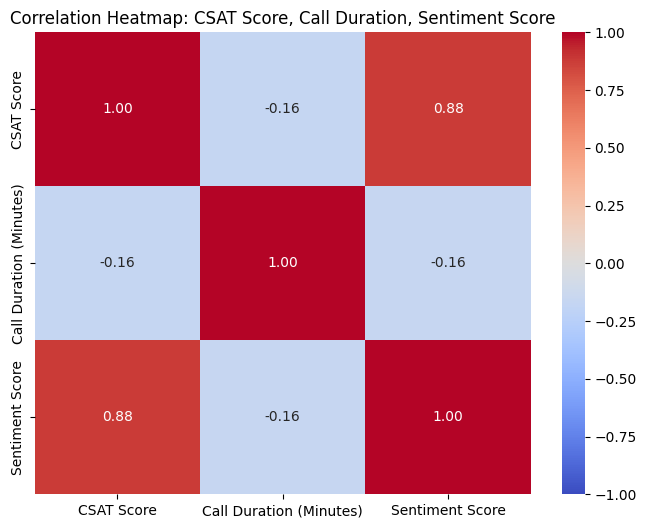

In [19]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Heatmap: CSAT Score, Call Duration, Sentiment Score')
plt.show()


 Investigating Patterns in Delayed Response Times

In [20]:
response_time_group = df.groupby('Response Time').agg({
    'CSAT Score': ['mean', 'std'],
    'Sentiment Score': ['mean', 'std'],
    'Call Duration (Minutes)': ['mean', 'std'],
    'ID': 'count'
}).reset_index()
response_time_group.columns = ['Response Time', 'Avg CSAT Score', 'CSAT Std Dev',
                               'Avg Sentiment Score', 'Sentiment Std Dev',
                               'Avg Call Duration (Minutes)', 'Duration Std Dev', 'Count']

response_time_group

,Response Time,Avg CSAT Score,CSAT Std Dev,Avg Sentiment Score,Sentiment Std Dev,Avg Call Duration (Minutes),Duration Std Dev,Count
0,Above SLA,3.125000,0.640870,1.625000,0.517549,35.875000,10.894789,8
1,Below SLA,5.888889,2.147350,2.888889,1.269296,31.777778,8.526104,9
2,Within SLA,5.566038,2.437759,2.566038,1.293615,23.867925,12.545360,53


Bar plot for Average CSAT Score by Response Time

<ipython-input-21-e519787a2655>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Response Time', y='Avg CSAT Score', data=response_time_group, palette='Set1')


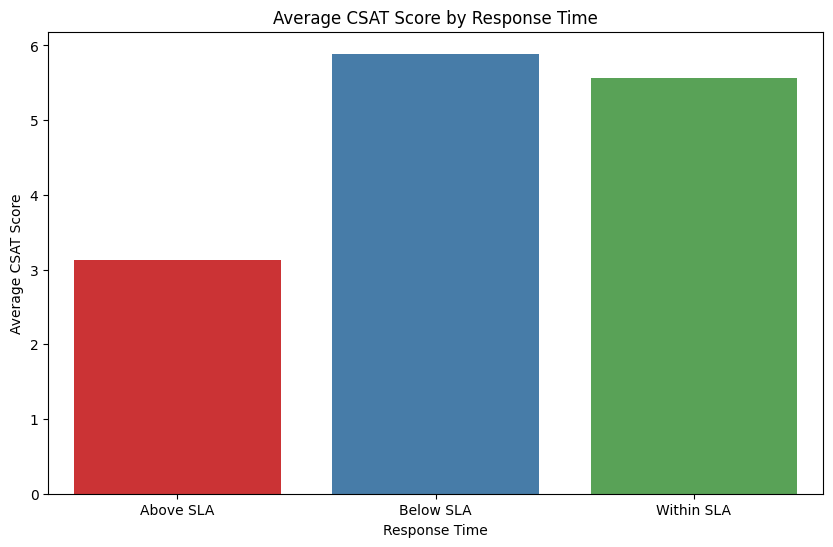

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response Time', y='Avg CSAT Score', data=response_time_group, palette='Set1')
plt.title('Average CSAT Score by Response Time')
plt.xlabel('Response Time')
plt.ylabel('Average CSAT Score')
plt.show()

Bar plot for Average Sentiment Score by Response Time

<ipython-input-22-204dd936fa76>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Response Time', y='Avg Sentiment Score', data=response_time_group, palette='Set2')


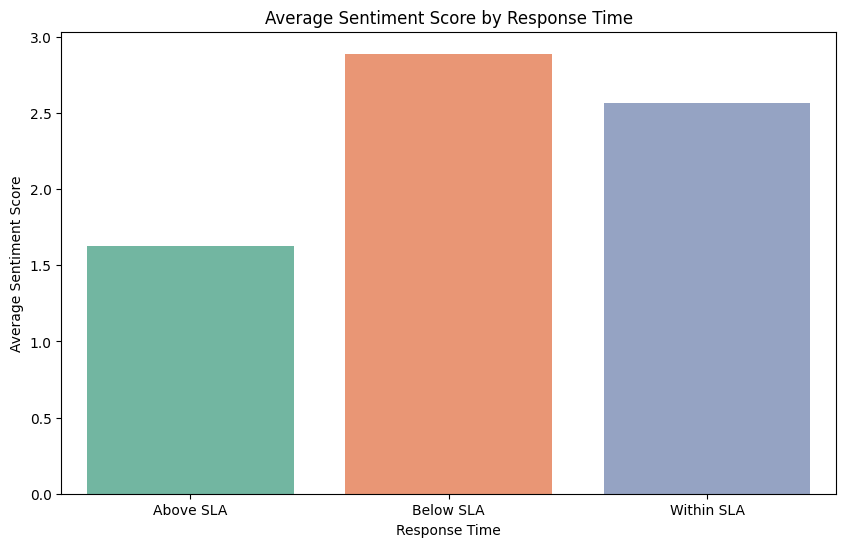

In [22]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response Time', y='Avg Sentiment Score', data=response_time_group, palette='Set2')
plt.title('Average Sentiment Score by Response Time')
plt.xlabel('Response Time')
plt.ylabel('Average Sentiment Score')
plt.show()

Bar plot for Average Call Duration by Response Time

<ipython-input-23-0c44da273409>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Response Time', y='Avg Call Duration (Minutes)', data=response_time_group, palette='Set3')


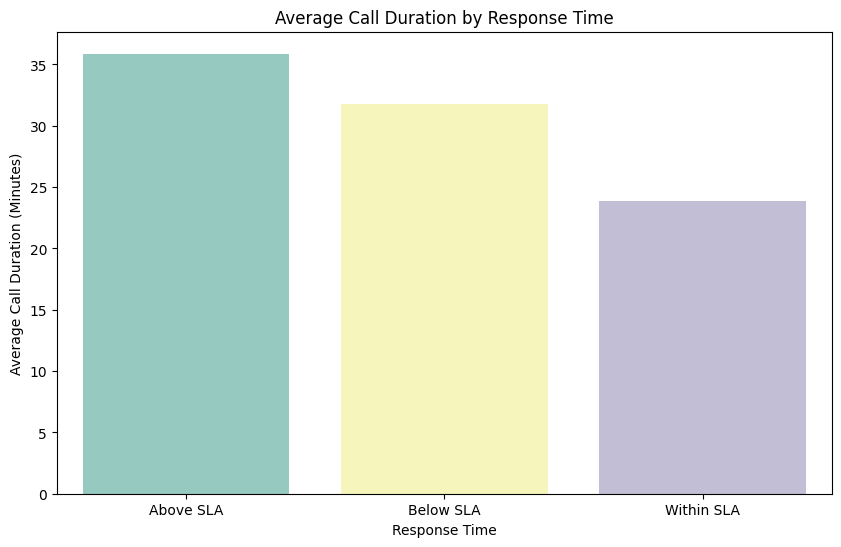

In [23]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Response Time', y='Avg Call Duration (Minutes)', data=response_time_group, palette='Set3')
plt.title('Average Call Duration by Response Time')
plt.xlabel('Response Time')
plt.ylabel('Average Call Duration (Minutes)')
plt.show()

Time-Series Analysis

In [24]:
time_series_data = df.resample('D', on='Call Timestamp').agg({
    'CSAT Score': 'mean',
    'Sentiment Score': 'mean'
}).reset_index()

Plotting the time-series data

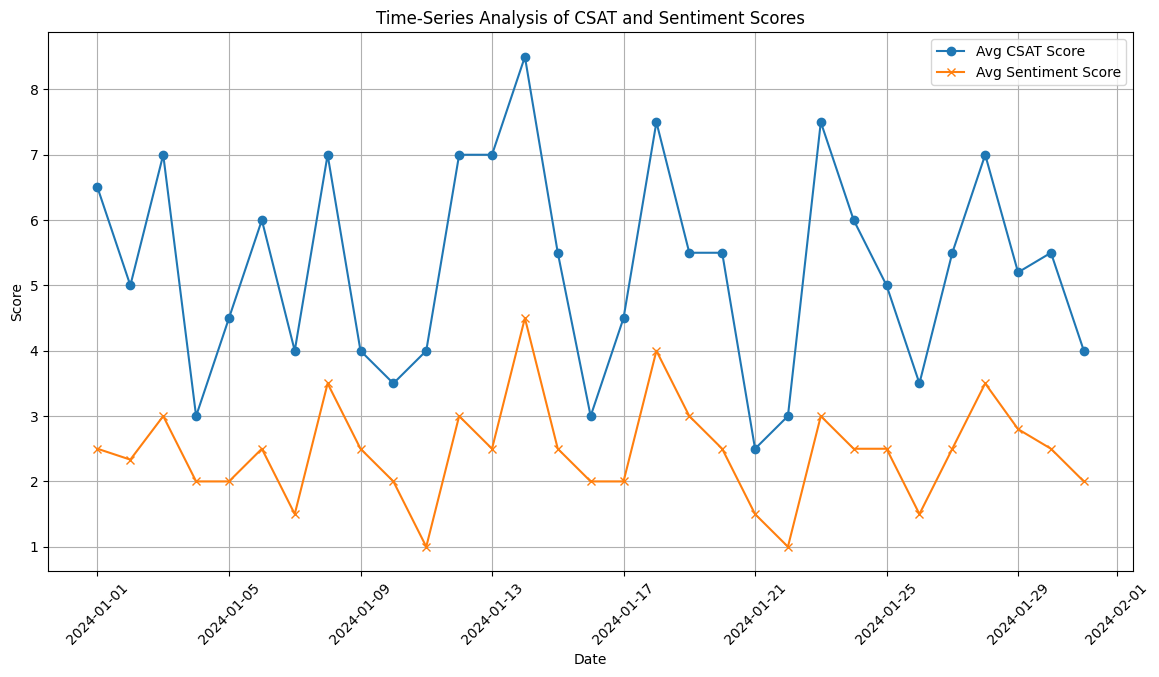

In [25]:
plt.figure(figsize=(14, 7))
plt.plot(time_series_data['Call Timestamp'], time_series_data['CSAT Score'], marker='o', label='Avg CSAT Score')
plt.plot(time_series_data['Call Timestamp'], time_series_data['Sentiment Score'], marker='x', label='Avg Sentiment Score')
plt.title('Time-Series Analysis of CSAT and Sentiment Scores')
plt.xlabel('Date')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()